In [1]:
!pip install numpy pandas matplotlib scikit-learn tensorflow --upgrade pandas_datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 1.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pandas_datareader import data as pdr
from scipy.stats import norm, t
import matplotlib.pyplot as plt

In [3]:
# Read the MSFT stock data from CSV (replace 'MSFT.csv' with your actual file path)
msft_data = pd.read_csv('SCB-1.csv', parse_dates=['Date'], index_col='Date')  # Assuming 'Date' column exists
close_prices = msft_data['Close'].values.reshape(-1, 1)

# Extract closing prices and calculate returns
closing_prices = msft_data['Close']   # Replace 'Close' if your column is named differently
returns = closing_prices.pct_change()
returns = returns.dropna()  # Remove the first row (NaN due to percentage change calculation)

# Simulate portfolio performance with 100% allocation to MSFT
weights = np.array([1.0])  # Single weight for MSFT
time_period = len(returns)  # Number of trading days in your data

mean_return = returns.mean()
cov_matrix = returns.var()  # Variance for a single asset

portfolio_return = np.sum(mean_return * weights) * time_period
portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(time_period)

print("Portfolio Return:", portfolio_return)
print("Portfolio Standard Deviation:", portfolio_std_dev)

print("Mean Return: ", mean_return)

Portfolio Return: inf
Portfolio Standard Deviation: nan
Mean Return:  inf


/tmp/ipykernel_46577/3707775267.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  msft_data = pd.read_csv('SCB-1.csv', parse_dates=['Date'], index_col='Date')  # Assuming 'Date' column exists
/home/codespace/.python/current/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [4]:

# Monte Carlo simulation for single-asset portfolio
mc_sims = 8000
T = 100
initialPortfolio = 1

meanM = np.full(shape=(T, 1), fill_value=mean_return)
stock_simulations = np.zeros((T, mc_sims))

for m in range(mc_sims):
    # Generate random returns (note: we only need one column now)
    Z = np.random.normal(size=(T, 1))
    std_dev = np.sqrt(cov_matrix)  # Standard deviation is the square root of variance
    dailyReturns = meanM + Z * std_dev  # Directly scale random values by std_dev

    # Calculate cumulative portfolio values (matrix multiplication with a single column is simplified)
    stock_simulations[:, m] = initialPortfolio * np.cumprod(1 + dailyReturns[:, 0], axis=0)

# Analysis (examples)
mean_portfolios = stock_simulations.mean(axis=1)
percentile_5 = np.percentile(stock_simulations, 5, axis=1)
percentile_95 = np.percentile(stock_simulations, 95, axis=1)

In [5]:
print(stock_simulations)
print("Mean: ", mean_portfolios)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Mean:  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]


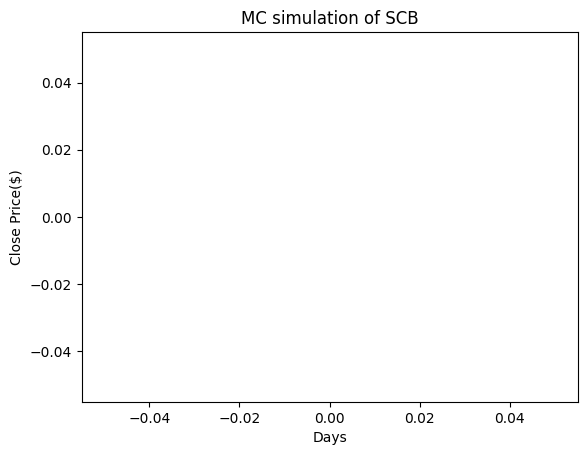

In [6]:
#plt.figure(figsize=(14, 5))
plt.plot(stock_simulations)
plt.ylabel('Close Price($)')
plt.xlabel('Days')
plt.title('MC simulation of SCB')
plt.show()

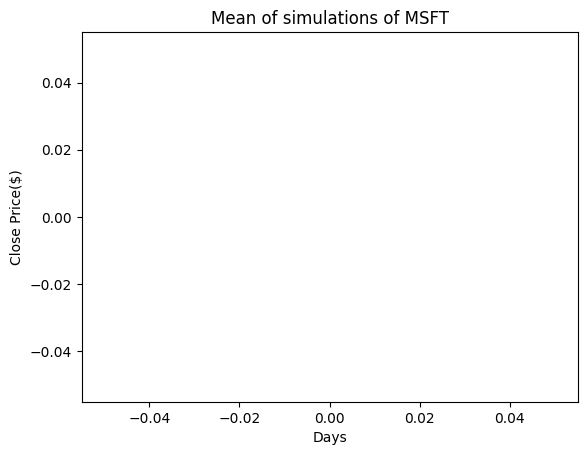

In [7]:
#plt.figure(figsize=(14, 5))
plt.plot(mean_portfolios)
plt.ylabel('Close Price($)')
plt.xlabel('Days')
plt.title('Mean of simulations of MSFT')
plt.show()